<h1>DEMAND TEMPERATURE FORECASTING</h1><br>

<p>1. Data Preparation</p>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels

In [3]:
df = pd.read_csv("datasets\demand_temperature.csv")
print(df.shape)
df.head()

(1344, 3)


,Unnamed: 0,Demand,Temperature
0,2014-01-01 00:00:00,3.794,18.05
1,2014-01-01 01:00:00,3.418,17.20
2,2014-01-01 02:00:00,3.152,16.45
3,2014-01-01 03:00:00,3.026,16.65
4,2014-01-01 04:00:00,3.022,16.40


In [4]:
df["date"] = pd.to_datetime(df["Unnamed: 0"])
df.set_index("date", inplace=True)
df.drop(columns=["Unnamed: 0"], inplace=True)
df.rename(columns={'Demand':'dem', 'Temperature':'temp'}, inplace=True)

In [5]:
df.head()

,dem,temp
date,,
2014-01-01 00:00:00,3.794,18.05
2014-01-01 01:00:00,3.418,17.20
2014-01-01 02:00:00,3.152,16.45
2014-01-01 03:00:00,3.026,16.65
2014-01-01 04:00:00,3.022,16.40


<p>2. Data Exploration and Visualization

In [6]:
print("Data Description: ")
print(df.describe())
print("Data Info:")
print(df.info())

Data Description: 
               dem         temp
count  1344.000000  1344.000000
mean      4.836867    22.031994
std       1.270180     6.089356
min       2.933000    10.950000
25%       3.894750    17.700000
50%       4.578000    20.625000
75%       5.438000    25.150000
max       9.313000    43.100000
Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1344 entries, 2014-01-01 00:00:00 to 2014-02-25 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dem     1344 non-null   float64
 1   temp    1344 non-null   float64
dtypes: float64(2)
memory usage: 31.5 KB
None


In [7]:
df.isna().sum()

dem     0
temp    0
dtype: int64

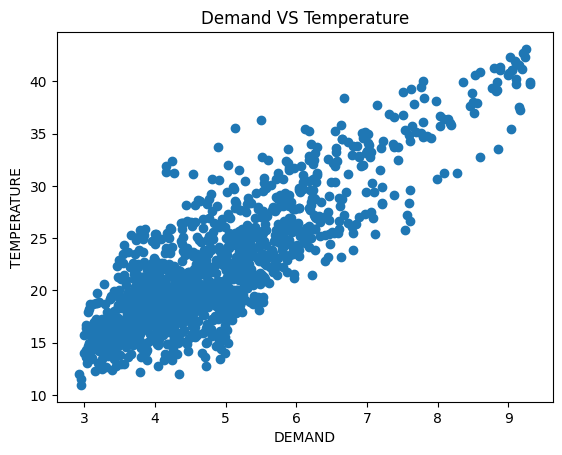

In [8]:
plt.scatter(df.dem, df.temp)
plt.xlabel("DEMAND")
plt.ylabel("TEMPERATURE")
plt.title("Demand VS Temperature")
plt.show()

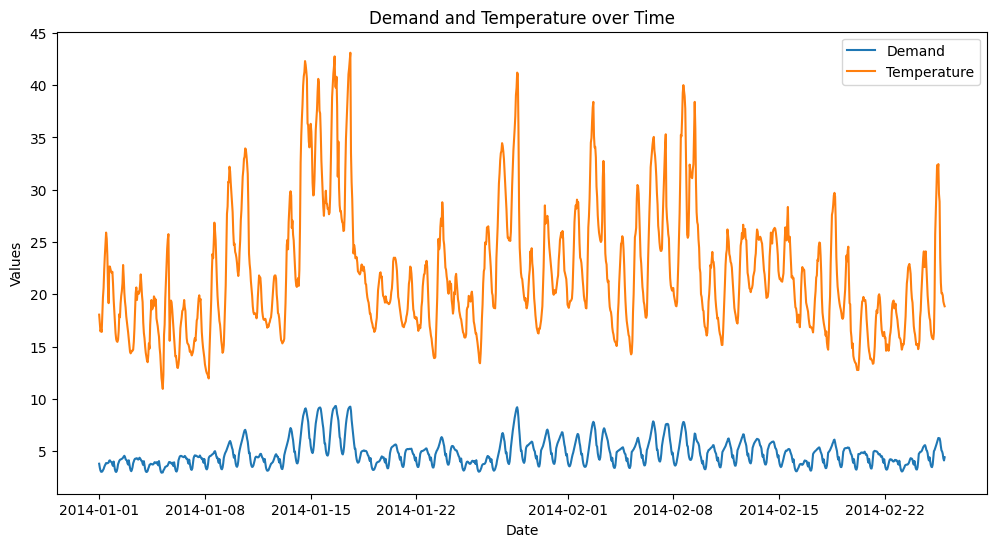

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["dem"], label="Demand")
plt.plot(df.index, df["temp"], label="Temperature")
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Demand and Temperature over Time")
plt.legend()
plt.show()

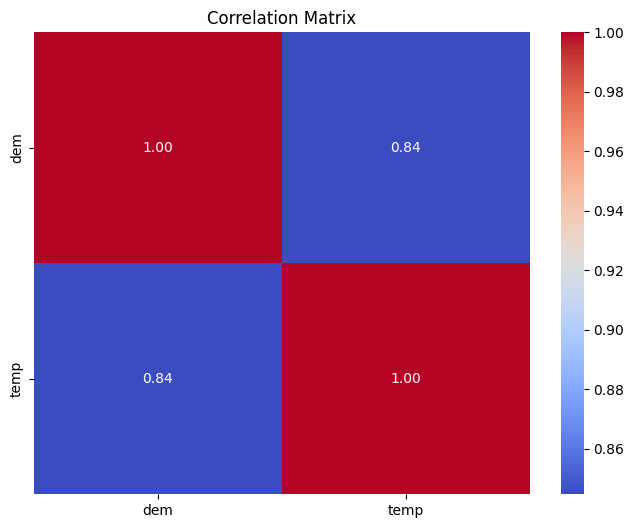

In [10]:
correlation_matrix = df[["dem", "temp"]].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


A correlation coefficient of 0.84 between "Demand" and "Temperature" indicates a strong positive correlation between the two variables. This means that as the temperature increases, the demand also tends to increase, and vice versa.

<p>3. Stationarity check

In [11]:
from statsmodels.tsa.stattools import adfuller

# Step 2: Augmented Dickey-Fuller Test
def perform_adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print("Augmented Dickey-Fuller Test:")
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# For "Demand" (now "dem")
print("For Demand: ")
perform_adf_test(df["dem"])

# For "Temperature" (now "temp")
print("For Temperature")
perform_adf_test(df["temp"])


For Demand: 
Augmented Dickey-Fuller Test:
ADF Statistic: -3.381945165671201
p-value: 0.011589975540970823
Critical Values:
   1%: -3.4353136835264664
   5%: -2.863732068602694
   10%: -2.5679370666896233
For Temperature
Augmented Dickey-Fuller Test:
ADF Statistic: -3.73696974921703
p-value: 0.0036221914630780983
Critical Values:
   1%: -3.4353136835264664
   5%: -2.863732068602694
   10%: -2.5679370666896233


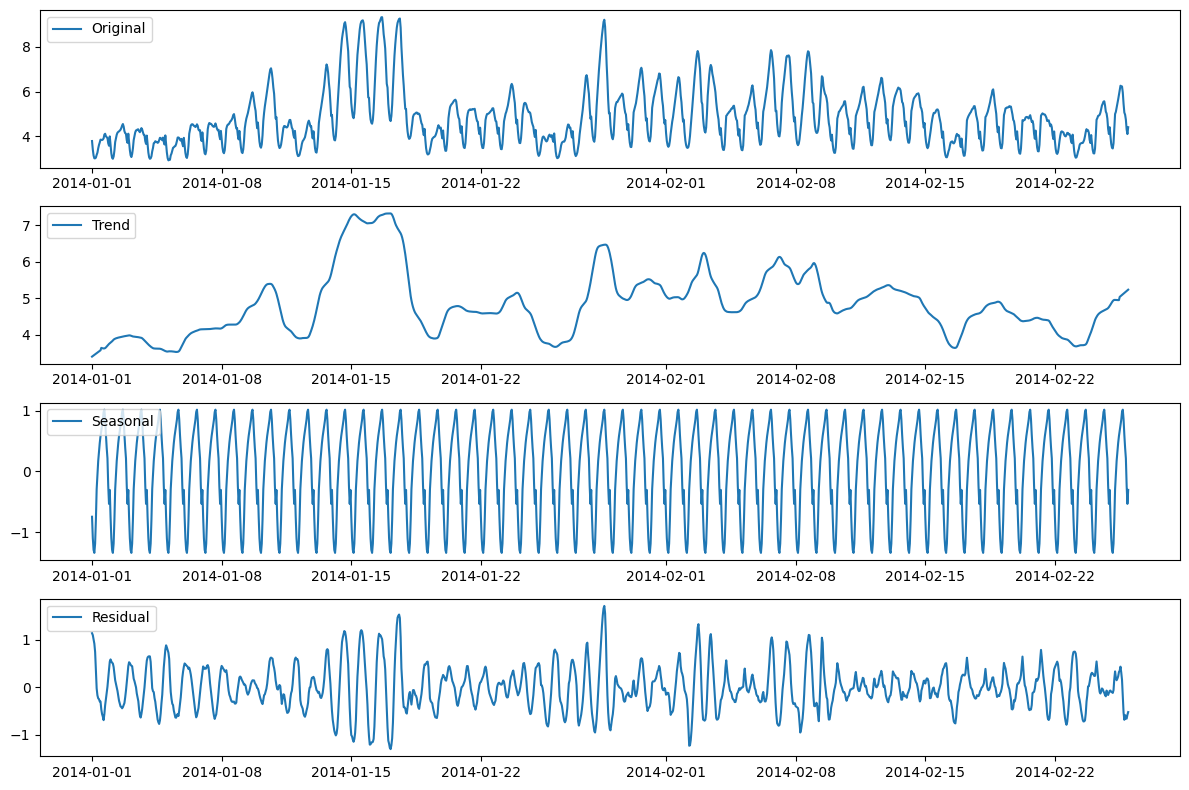

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Performing seasonal decomposition
decomposition = seasonal_decompose(df['dem'], model='additive', extrapolate_trend='freq')
# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['dem'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



The data is Seasonal, but we can't see any clear trend in the data

<p>4. Model Identification and Order Selection

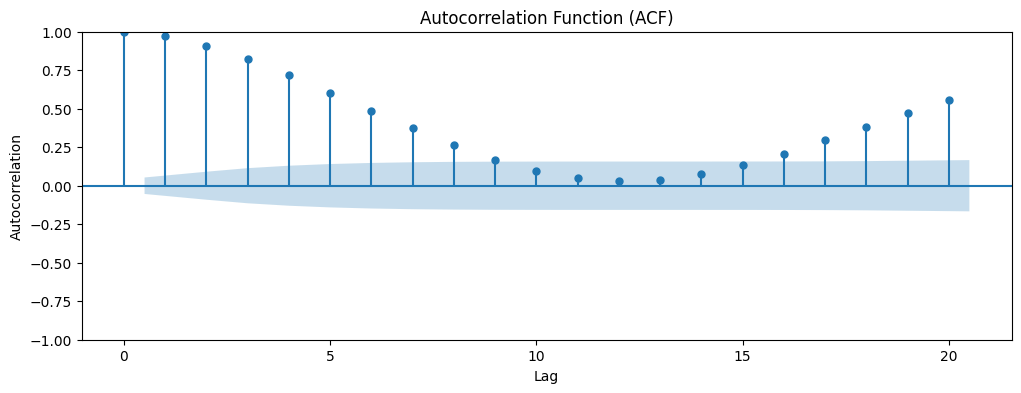

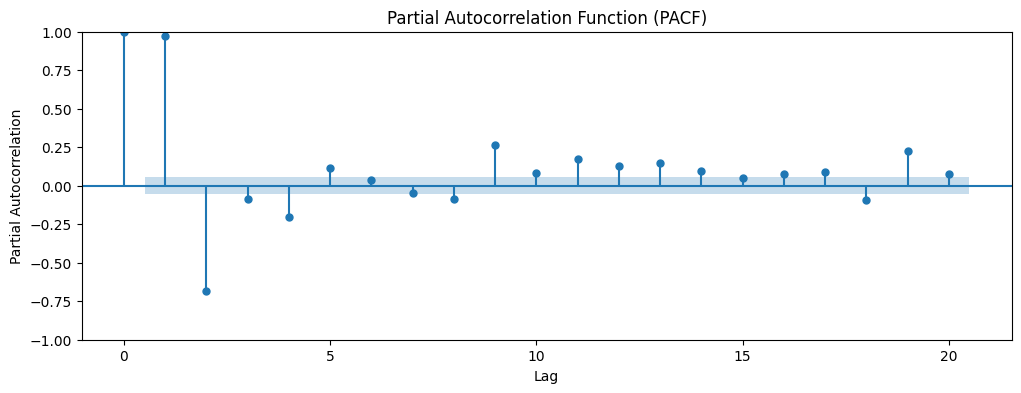

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

time_series = df['dem']
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(time_series, ax=ax, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(time_series, ax=ax, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [14]:
# Determining if the time series is stationary or not using dikey fuller test
result = adfuller(df['dem'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.381945165671201
p-value: 0.011589975540970823


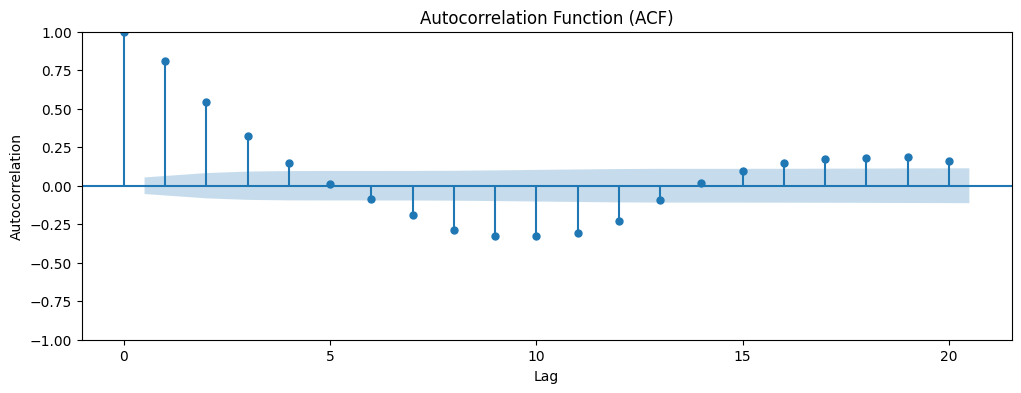

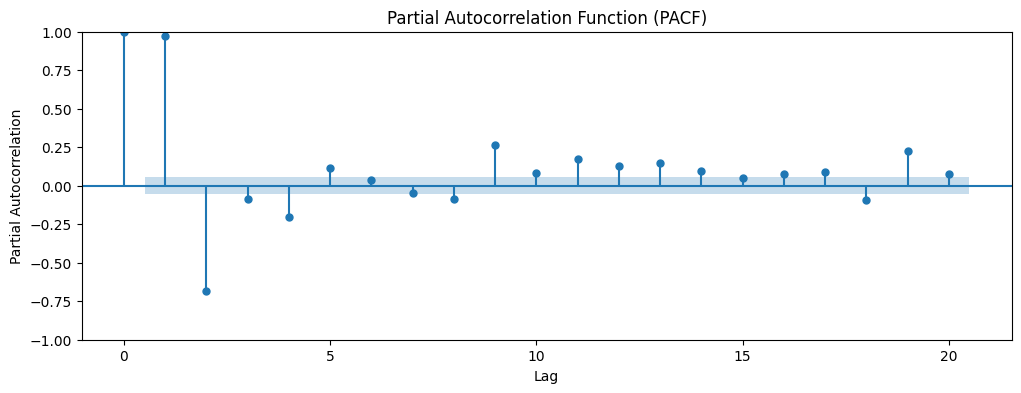

In [15]:
time_series = df['dem']
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(time_series.diff(24).diff().dropna(), ax=ax, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(time_series, ax=ax, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

ADF Statistic: -10.135227896157776
p-value: 8.70492898791996e-18


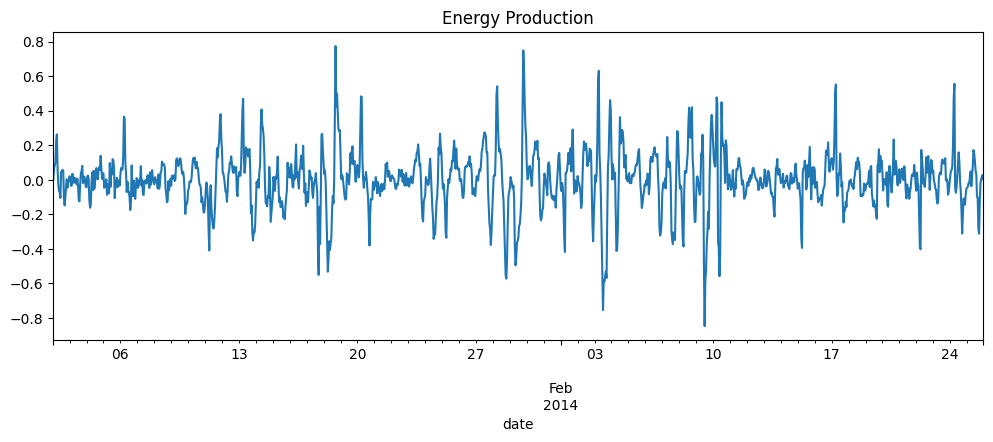

In [16]:
data_diff = df["dem"].diff(24).diff().dropna()
result_diff = adfuller(data_diff)
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

data_diff.plot(figsize = (12,4), title = 'Energy Production')
plt.show()

According to the ACF, PACF plots, adf statistics and p-value let us assume d=1,D=24.

In [17]:
from pmdarima import auto_arima
exogenous_var = df['temp']
# Performing the auto_arima search with exogenous variables
best_model = auto_arima(df['dem'], exogenous=exogenous_var, seasonal=False, stepwise=True, information_criterion='aic', trace=True)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (24) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-318.429, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=519.722, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-264.943, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-96.037, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=517.725, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-271.929, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-303.508, Time=1.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.69 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-350.318, Time=1.61 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-351.976, Time=0.95 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-310.698, Time=0.56 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-350.299, Time=2.96 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-151.772, Time=0.64 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-346.962, Time=1.08 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC

In [22]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1344
Model:               SARIMAX(1, 1, 3)   Log Likelihood                 181.988
Date:                Tue, 08 Aug 2023   AIC                           -353.976
Time:                        12:52:24   BIC                           -327.962
Sample:                    01-01-2014   HQIC                          -344.231
                         - 02-25-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3988      0.062      6.383      0.000       0.276       0.521
ma.L1          0.2739      0.057      4.807      0.000       0.162       0.386
ma.L2          0.1231      0.046      2.650      0.0

<p>5. Model Training and Evaluation

In [39]:
print(len(df))

1344


In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Splitting data into training and validation sets 
train = df.iloc[:1300]
valid = df.iloc[1300:]

# Train the SARIMAX model with the best-fitted parameters
model = SARIMAX(train["dem"], exog=train["temp"], order=(1,1,3), seasonal_order=(1,1,3,24))
results = model.fit()
print(results.summary())



c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                dem   No. Observations:                 1300
Model:             SARIMAX(1, 1, 3)x(1, 1, 3, 24)   Log Likelihood                1466.444
Date:                            Tue, 08 Aug 2023   AIC                          -2912.887
Time:                                    13:20:10   BIC                          -2861.380
Sample:                                01-01-2014   HQIC                         -2893.543
                                     - 02-24-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
temp           0.0080      0.001      8.780      0.000       0.006       0.010
ar.L1          0.6510      0.047   

In [50]:

forecast_periods = 60
exog_forecast = exogenous_var.iloc[-forecast_periods:]  


forecast = results.get_forecast(steps=forecast_periods, exog=exog_forecast.values.reshape(-1, 1))
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()


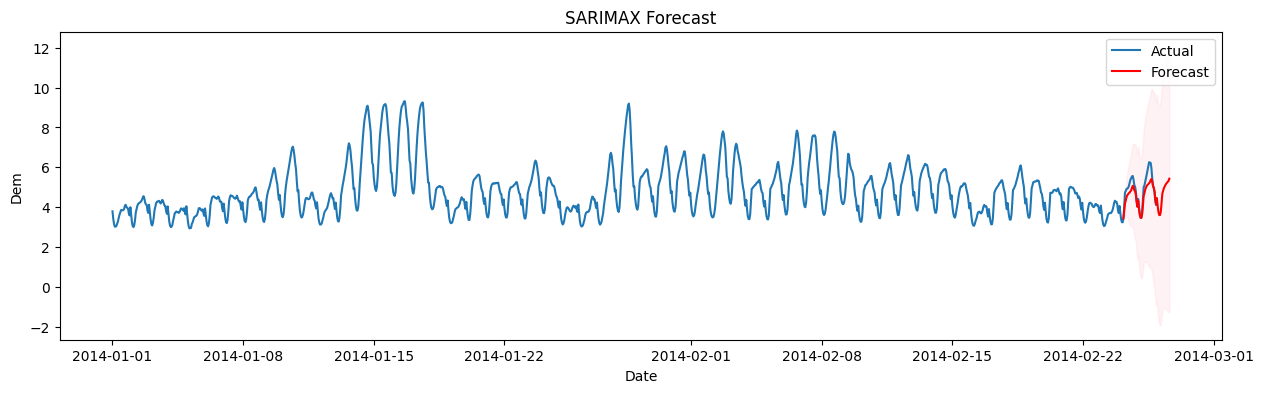

In [51]:
# Plotting actual data and forecasts
plt.figure(figsize=(15, 4))
plt.plot(df['dem'], label='Actual')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Dem')
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()


Model Evaluation and Metrics:

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(valid["dem"], forecast_mean)
mae = mean_absolute_error(valid["dem"], forecast_mean)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.17247833920154565
Mean Absolute Error (MAE): 0.33026028144258307
Root Mean Squared Error (RMSE): 0.4153051157902412


After evaluating the SARIMAX model's forecasting performance on the test data, the following metrics were calculated:

Mean Squared Error (MSE): 0.1725
Mean Absolute Error (MAE): 0.3303
Root Mean Squared Error (RMSE): 0.4153
These metrics provide insights into the accuracy of the model's predictions compared to the actual values. The MSE measures the average squared difference between the forecasted and actual values, with a lower value indicating better accuracy. The MAE represents the average absolute difference between the forecasts and actual values, while the RMSE provides the square root of the average squared difference.

Based on these metrics, the model's performance seems reasonable, but there might be room for further improvement.